In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
file_paths = [
    "outputs/2way-single-intersection/dqn_conn0_ep1.csv",
    "outputs/2way-single-intersection/dqn_conn0_ep2.csv",
    "outputs/2way-single-intersection/dqn_conn0_ep3.csv",
    "outputs/2way-single-intersection/dqn_conn0_ep4.csv",
    "outputs/2way-single-intersection/dqn_conn0_ep5.csv"
]

# Load the files
data_frames = [pd.read_csv(file) for file in file_paths]

# Preview the structure of one file to determine columns of interest
data_frames[0].head(), data_frames[0].columns


(   step  system_total_stopped  system_total_waiting_time   
 0   0.0                     0                        0.0  \
 1   5.0                     0                        0.0   
 2  10.0                     0                        0.0   
 3  15.0                     4                        7.0   
 4  20.0                    10                       51.0   
 
    system_mean_waiting_time  system_mean_speed  t_stopped   
 0                  0.000000           0.000000          0  \
 1                  0.000000          12.950399          0   
 2                  0.000000          12.071554          0   
 3                  0.388889           5.457164          4   
 4                  2.833333           5.760182         10   
 
    t_accumulated_waiting_time  t_average_speed  agents_total_stopped   
 0                         0.0         1.000000                     0  \
 1                         0.0         0.916650                     0   
 2                         0.0         

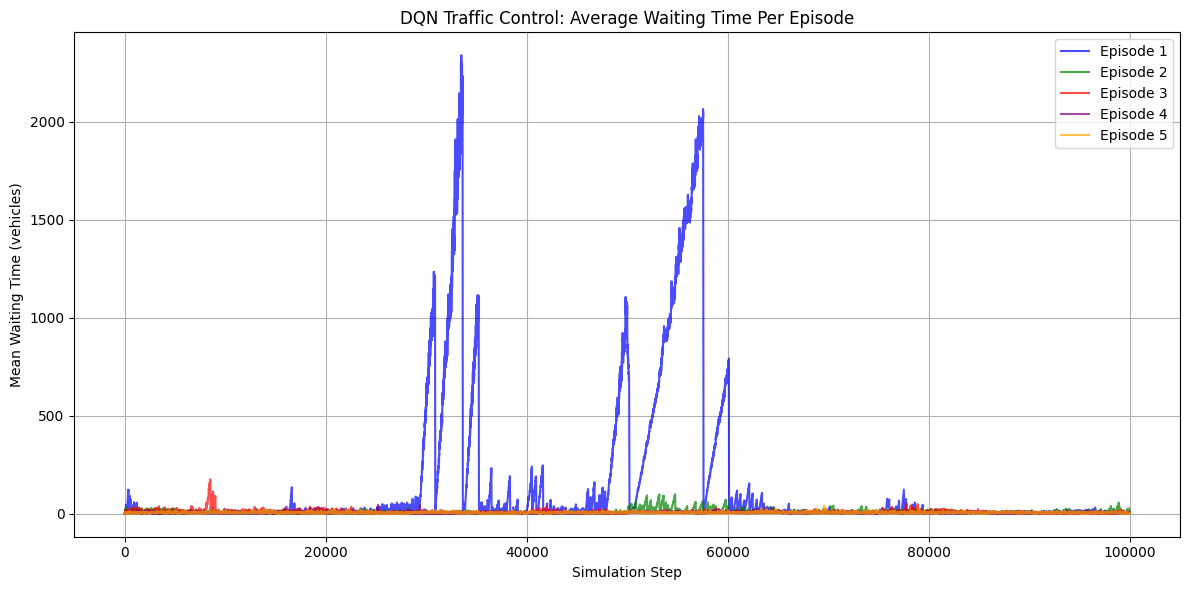

In [2]:
# Plot total waiting time for each file separately in a single plot
plt.figure(figsize=(12, 6))

colors = ['blue', 'green', 'red', 'purple', 'orange']
labels = [f"Episode {i+1}" for i in range(len(data_frames))]

for i, (data, color, label) in enumerate(zip(data_frames, colors, labels)):
    plt.plot(data['step'], data['system_mean_waiting_time'], label=label, color=color, alpha=0.7)

plt.xlabel("Simulation Step")
plt.ylabel("Mean Waiting Time (vehicles)")
plt.title("DQN Traffic Control: Average Waiting Time Per Episode")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [3]:
# Calculate the numerical summary of total waiting time for each episode
summary_stats = {
    f"Episode {i+1}": {
        "Total Waiting Time (Sum)": data["system_mean_waiting_time"].sum(),
        "Average Waiting Time": data["system_mean_waiting_time"].mean(),
        "Maximum Waiting Time": data["system_mean_waiting_time"].max(),
        "Minimum Waiting Time": data["system_mean_waiting_time"].min(),
    }
    for i, data in enumerate(data_frames)
}

# Convert to a DataFrame for better visualization
summary_df = pd.DataFrame(summary_stats).T
summary_df

,Total Waiting Time (Sum),Average Waiting Time,Maximum Waiting Time,Minimum Waiting Time
Episode 1,3.000741e+06,150.029534,2340.333333,0.0
Episode 2,1.942180e+05,9.710415,99.781818,0.0
Episode 3,1.695015e+05,8.474652,175.511111,0.0
Episode 4,1.127385e+05,5.636643,45.875000,0.0
Episode 5,1.166357e+05,5.831495,41.761905,0.0


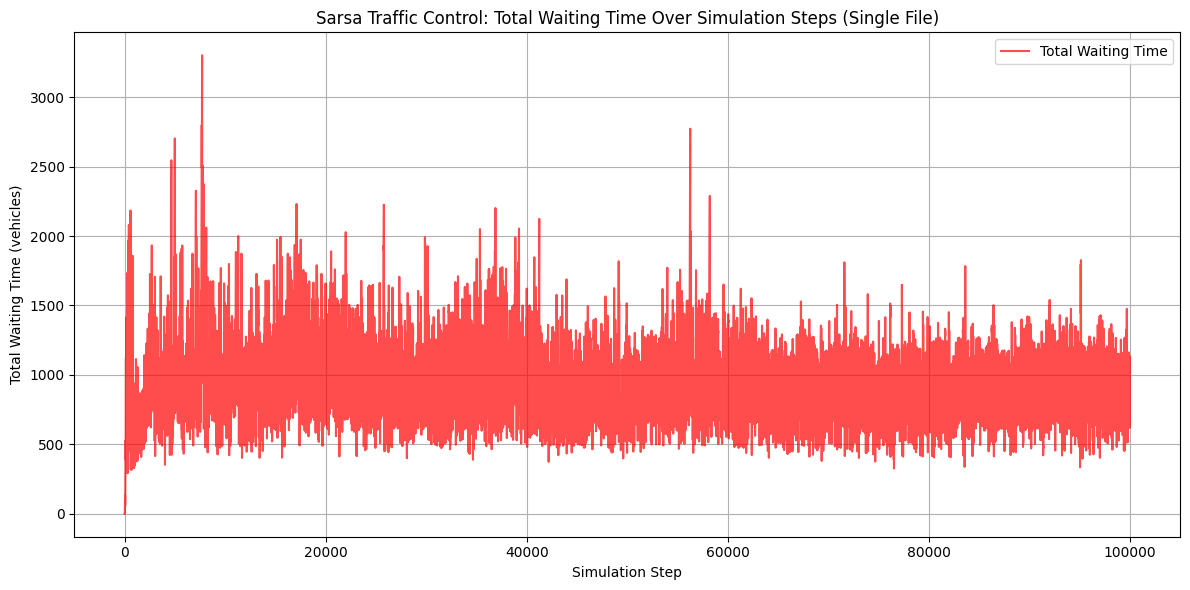

In [4]:
# Load the single CSV file
single_file_path = "outputs/2way-single-intersection/sarsa_lambda_conn0_ep1.csv"
single_data = pd.read_csv(single_file_path)

# Plot the total waiting time over simulation steps for this file
plt.figure(figsize=(12, 6))
plt.plot(single_data['step'], single_data['system_total_waiting_time'], label="Total Waiting Time", color='red', alpha=0.7)

plt.xlabel("Simulation Step")
plt.ylabel("Total Waiting Time (vehicles)")
plt.title("Sarsa Traffic Control: Total Waiting Time Over Simulation Steps (Single File)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [6]:
# Calculate the numerical summary for the SARSA dataset
sarsa_summary_stats = {
    "SARSA Episode": {
        "Average Waiting Time": single_data["system_mean_waiting_time"].mean(),
        "Maximum Waiting Time": single_data["system_mean_waiting_time"].max(),
        "Minimum Waiting Time": single_data["system_mean_waiting_time"].min(),
    }
}

# Convert to a DataFrame for better visualization
sarsa_summary_df = pd.DataFrame(sarsa_summary_stats).T
sarsa_summary_df


,Average Waiting Time,Maximum Waiting Time,Minimum Waiting Time
SARSA Episode,10.819051,30.293578,0.0
